<a href="https://colab.research.google.com/github/junaiskv94/Bike-SHaring-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
import lightgbm as lgb
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, AdaBoostRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error,r2_score, mean_squared_log_error,mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import warnings
import sklearn.exceptions
warnings.filterwarnings("ignore", category=sklearn.exceptions.ConvergenceWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
#mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#loading the data
df= pd.read_csv('/content/drive/MyDrive/capstone_project/EDA-2/Copy of SeoulBikeData.csv',encoding='cp1252')

**Preliminary Data Inspection**

In [4]:
# Looking the first five rows
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
# Looking for  number of rows and columns 

df.shape

(8760, 14)

8760 rows and 14 colums

In [6]:
# look for data type and checking any missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [7]:
# Check for null values
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

No missing values and data contains numerical and categorical features

In [8]:
# Checking the numerical values
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [9]:
# Numerical features
Numerical_var=df.describe().columns.to_list()
Numerical_var

['Rented Bike Count',
 'Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)']

In [10]:
# Categorical features
categorical_var=list(set(df.columns.to_list())-set(df.describe().columns.to_list()))
categorical_var

['Seasons', 'Date', 'Functioning Day', 'Holiday']

In [11]:
# Change the feature(column) names
df.rename(columns = {'Rented Bike Count':'Bike_Count'}, inplace = True)
df.rename(columns = {'Rainfall(mm)':'Rainfall'}, inplace = True)
df.rename(columns = {'Temperature(°C)':'Temperature'}, inplace = True)
df.rename(columns = {'Humidity(%)':'Humidity'}, inplace = True)
df.rename(columns = {'Wind speed (m/s)':'Wind_Speed'}, inplace = True)
df.rename(columns = {'Visibility (10m)':'Visibility'}, inplace = True)
df.rename(columns = {'Solar Radiation (MJ/m2)':'Solar_Radiation'}, inplace = True)
df.rename(columns = {'Snowfall (cm)':'Snowfall'}, inplace = True)
df.rename(columns = {'Functioning Day':'Functioning_Day'}, inplace = True)

In [12]:
# Add a new column for Month in the dataFrame
df['Month']=pd.DatetimeIndex(df['Date']).month

In [13]:
# convert the hour & month feture in to cateogorical datatype
cols=['Hour','Month',]
for col in cols:
  df[col]=df[col].astype('object')

In [14]:
# check the changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Bike_Count                 8760 non-null   int64  
 2   Hour                       8760 non-null   object 
 3   Temperature                8760 non-null   float64
 4   Humidity                   8760 non-null   int64  
 5   Wind_Speed                 8760 non-null   float64
 6   Visibility                 8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar_Radiation            8760 non-null   float64
 9   Rainfall                   8760 non-null   float64
 10  Snowfall                   8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning_Day            8760 non-null   objec

In [15]:
# Numerical features
Numerical_var=df.describe().columns.to_list()
Numerical_var

['Bike_Count',
 'Temperature',
 'Humidity',
 'Wind_Speed',
 'Visibility',
 'Dew point temperature(°C)',
 'Solar_Radiation',
 'Rainfall',
 'Snowfall']

In [16]:
# Categorical features
categorical_var=list(set(df.columns.to_list())-set(df.describe().columns.to_list()))
categorical_var

['Date', 'Seasons', 'Month', 'Holiday', 'Functioning_Day', 'Hour']

In [17]:
df.head()

,Date,Bike_Count,Hour,Temperature,Humidity,Wind_Speed,Visibility,Dew point temperature(°C),Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,Month
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1


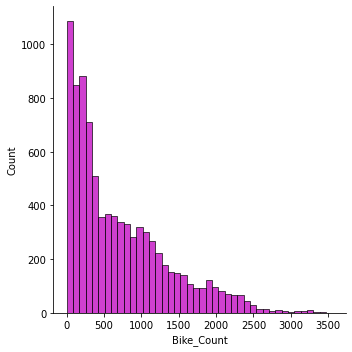

In [18]:
# Plot the dependenr variable 'Bike_count'
ax=sns.displot((df['Bike_Count']), color="m")
plt.show()

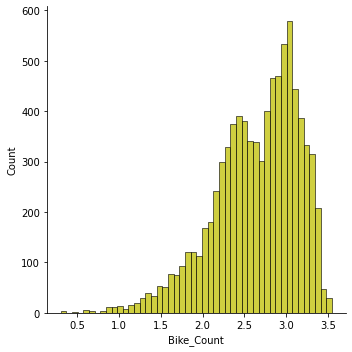

In [19]:
ax=sns.displot(np.log10(df['Bike_Count']), color="y")
plt.show()

Still skewed after log transformation

In [ ]:
# Check for skew in data
df['Bike_Count'].sort_values(ascending=False)

4818    3556
4866    3418
4650    3404
4842    3384
4458    3380
        ... 
3158       0
7376       0
3157       0
7288       0
7234       0
Name: Bike_Count, Length: 8760, dtype: int64

In [ ]:
np.log10(df['Bike_Count']).describe()

count    8760.000000
mean            -inf
std              NaN
min             -inf
25%         2.281033
50%         2.702861
75%         3.027452
max         3.550962
Name: Bike_Count, dtype: float64

Better to do a Square Root Transform to avoid the infinity values

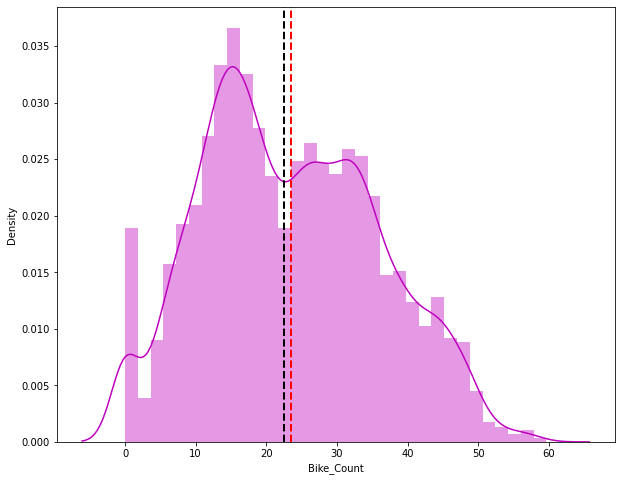

In [ ]:
#Apply square root to Bike Count to improve skewness
plt.figure(figsize=(10,8))
plt.xlabel('Bike Count')
plt.ylabel('Density')

ax=sns.distplot(np.sqrt(df['Bike_Count']), color="m")
ax.axvline(np.sqrt(df['Bike_Count']).mean(), color='r', linestyle='dashed', linewidth=2)
ax.axvline(np.sqrt(df['Bike_Count']).median(), color='black', linestyle='dashed', linewidth=2)

plt.show()

The distribution after square root transformttion is much better

In [ ]:
# Apply square root transformation on 'Bike Count'.
df['Bike_Count'] = np.sqrt(df['Bike_Count'])

In [ ]:
df.head()

,Date,Bike_Count,Hour,Temperature,Humidity,Wind_Speed,Visibility,Dew point temperature(°C),Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,Month
0,01/12/2017,15.937377,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1
1,01/12/2017,14.282857,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1
2,01/12/2017,13.152946,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1
3,01/12/2017,10.344080,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1
4,01/12/2017,8.831761,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1


**Exploratory Data Analysis & Data Preparation**

**Distribution vs Hour,Month,Holiday,Season**\
Looking how bike count varies across these cateogorical data

In [18]:
# Removing date from cateogorical list
categorical_var.remove('Date')


In [19]:
categorical_var

['Seasons', 'Month', 'Holiday', 'Functioning_Day', 'Hour']

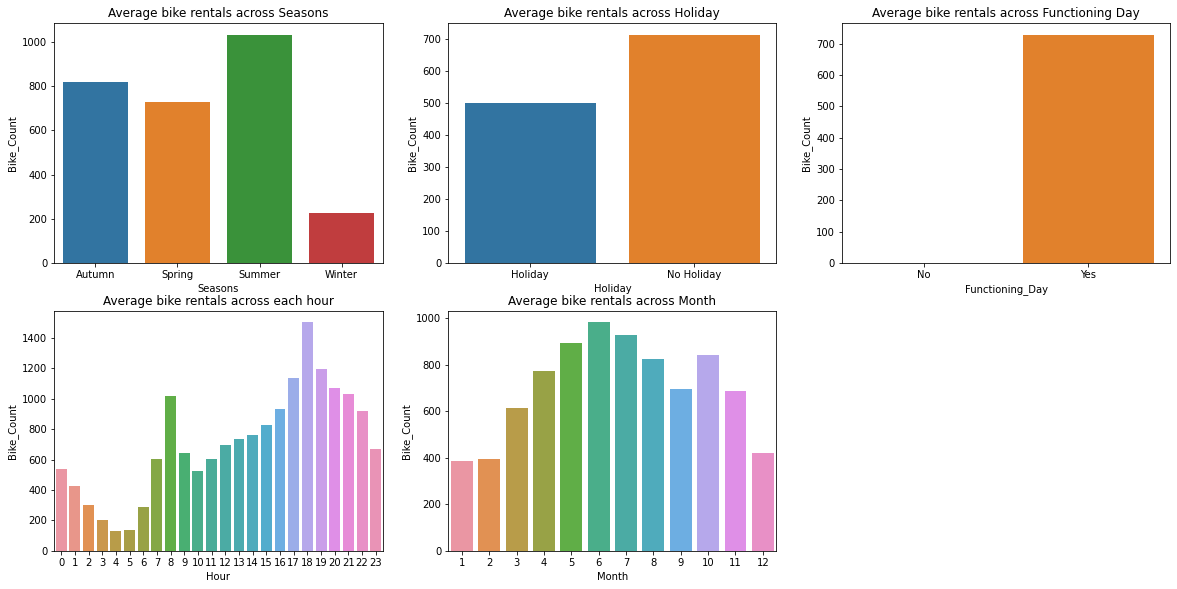

In [20]:
# Average values across each of the categorical columns 
fig = plt.figure(figsize=(20, 15))
axes = fig.add_subplot(3, 3, 1)
Bike_season=df.groupby(['Seasons'])['Bike_Count'].mean().reset_index()
sns.barplot(data=Bike_season,x='Seasons', y='Bike_Count', ax=axes)
axes.set(xlabel='Seasons', ylabel='Bike_Count', title='Average bike rentals across Seasons')

axes = fig.add_subplot(3, 3, 2)
Bike_holiday = pd.DataFrame(df.groupby(['Holiday'])['Bike_Count'].mean()).reset_index()
sns.barplot(data=Bike_holiday, x='Holiday', y='Bike_Count', ax=axes)
axes.set(xlabel='Holiday', ylabel='Bike_Count', title='Average bike rentals across Holiday')

axes = fig.add_subplot(3, 3, 3)
Bike_Functioning_Day =pd.DataFrame(df.groupby(['Functioning_Day'])['Bike_Count'].mean()).reset_index()
sns.barplot(data=Bike_Functioning_Day, x='Functioning_Day', y='Bike_Count', ax=axes)
axes.set(xlabel='Functioning_Day', ylabel='Bike_Count', title='Average bike rentals across Functioning Day')


axes = fig.add_subplot(3, 3, 4)
Bike_Functioning_Day =pd.DataFrame(df.groupby(['Hour'])['Bike_Count'].mean()).reset_index()
sns.barplot(data=Bike_Functioning_Day, x='Hour', y='Bike_Count', ax=axes)
axes.set(xlabel='Hour', ylabel='Bike_Count', title='Average bike rentals across each hour')

axes = fig.add_subplot(3, 3, 5)
Bike_Functioning_Day =pd.DataFrame(df.groupby(['Month'])['Bike_Count'].mean()).reset_index()
sns.barplot(data=Bike_Functioning_Day, x='Month', y='Bike_Count', ax=axes)
axes.set(xlabel='Month', ylabel='Bike_Count', title='Average bike rentals across Month')


plt.show()




**Inferenece:**


*   The peak requirement for bikes are during the start and end of office hours
*  The Bikes are most used in Summers and Least used during winters
*  On holidays the demand is not that as much as that on Working days
*  The demand is more during evening compared to morning
*The Demand for bikes are less during the start and end of the year and the demand grows till June and then shows a decrfeasing trend


*  There is no bike rent  in  non functioning day








seaborn boxplots to get an idea of the distribution and outliers acorss various categorical features

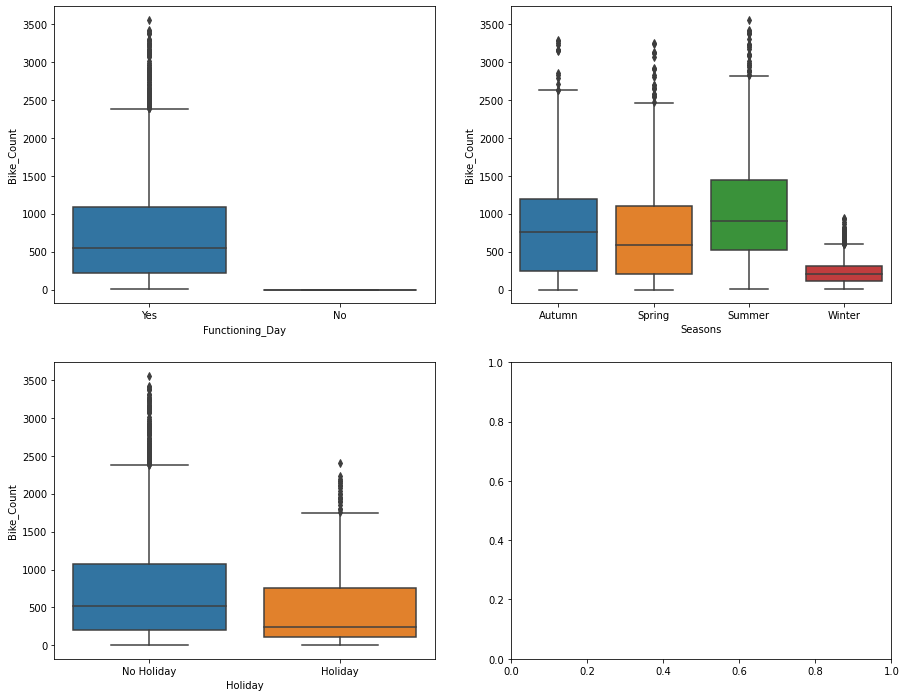

In [21]:
# Seaborn boxplots to get an idea of the distribution/outliers
f, axes = plt.subplots(2, 2, figsize=(15, 12))
sns.boxplot(data=df, y='Bike_Count', x='Functioning_Day', ax=axes[0][0])
hue_order= ['Autumn', 'Spring', 'Summer', 'Winter']
sns.boxplot(data=df, y='Bike_Count', x='Seasons', ax=axes[0][1], order=hue_order)
sns.boxplot(data=df, y='Bike_Count', x='Holiday', ax=axes[1][0])

plt.show() 

**Demand on Holidays**

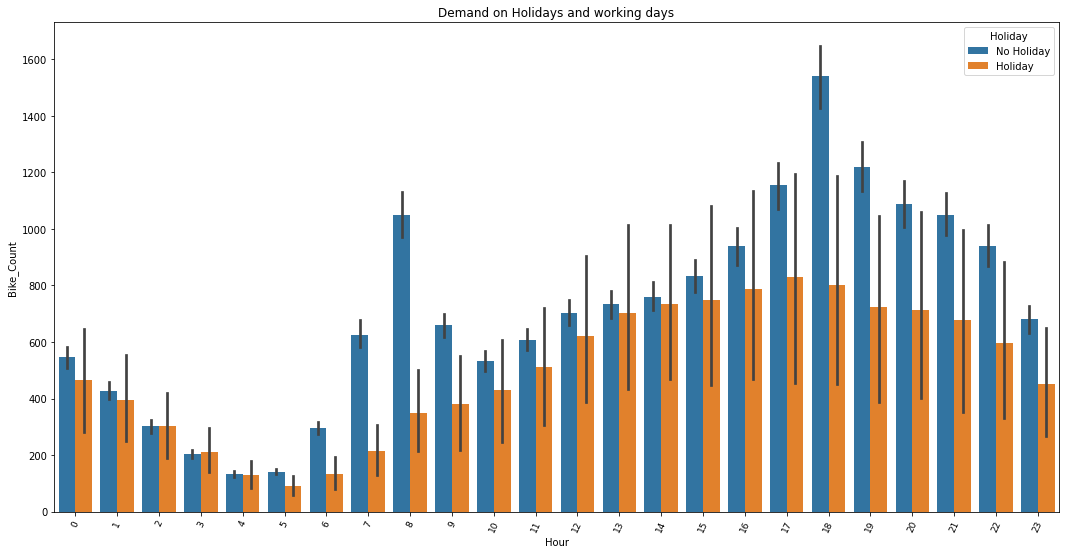

In [22]:
plt.figure(figsize=(18,9))
plt.xticks(rotation=65,fontsize=9)
plt.xlabel("Hour")
plt.ylabel("Bike_Count")
plt.title("Demand on Holidays and working days")
sns.barplot('Hour', 'Bike_Count', hue='Holiday', data=df);
plt.show()

**Inference**


*   Bike reservations are lesser in Winter season compared to Summer and Autumn
*   Bike reservation are lesser on holidays
*   There is no rental on non functioning days
*   On holidays the demand is not that as much as that on Working days. 
    But the trend of demand more or less remains the same
*   The demand is more during evening compared to morning.








DIstribution of Numerical Vraiables

In [23]:
Numerical_var

['Bike_Count',
 'Temperature',
 'Humidity',
 'Wind_Speed',
 'Visibility',
 'Dew point temperature(°C)',
 'Solar_Radiation',
 'Rainfall',
 'Snowfall']

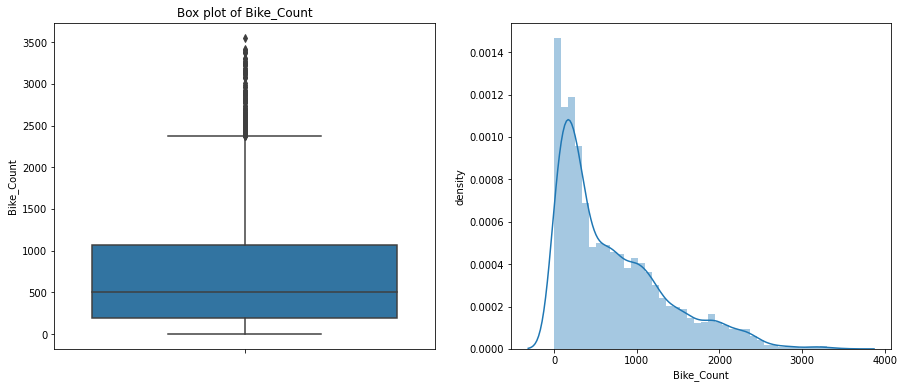

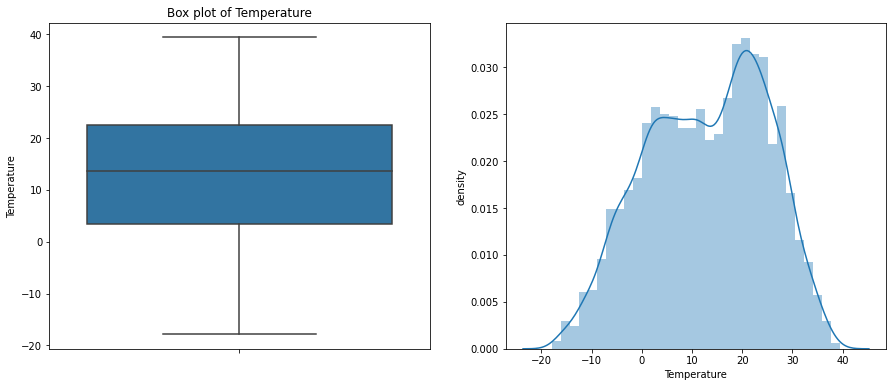

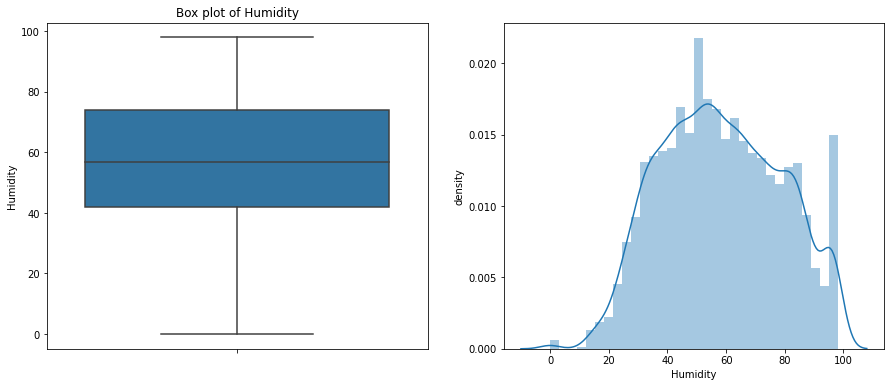

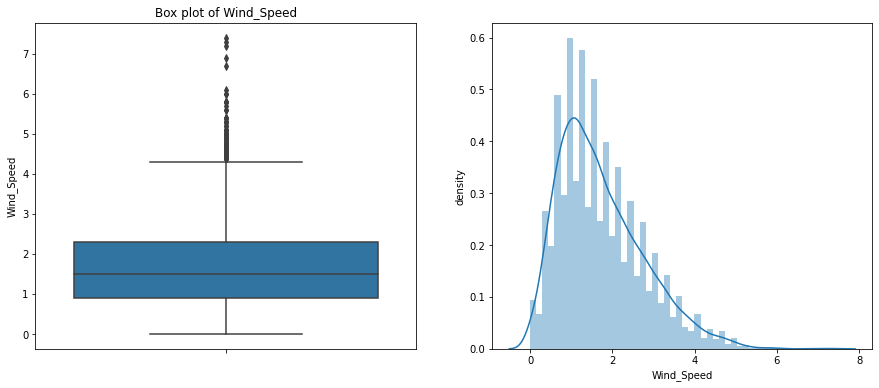

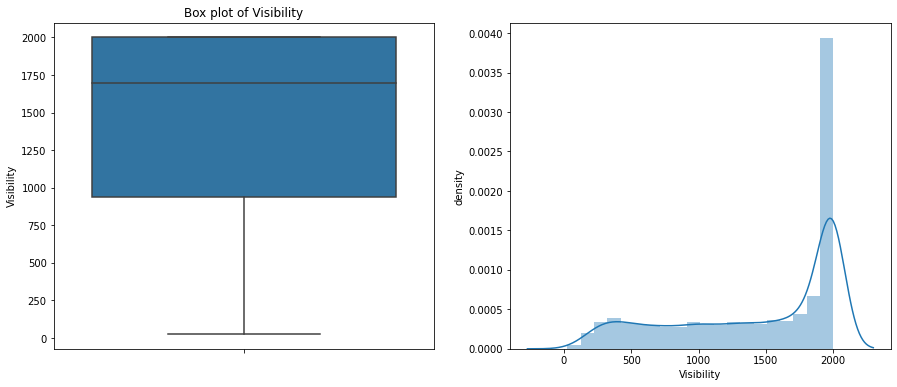

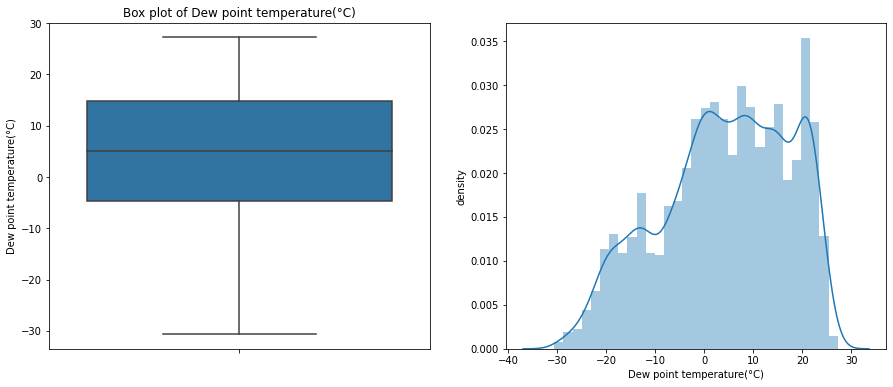

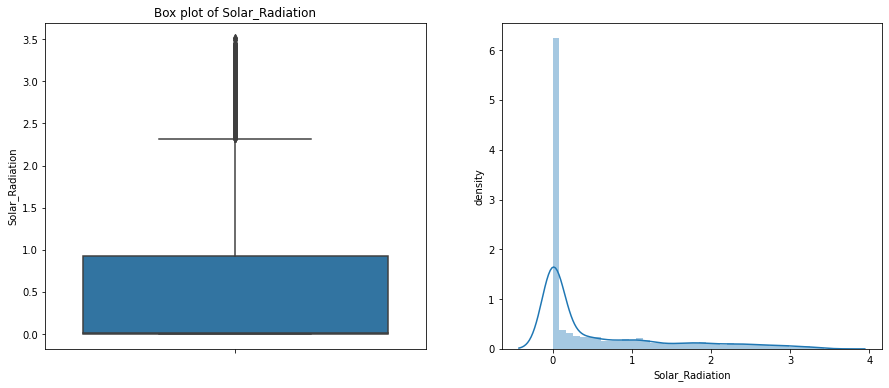

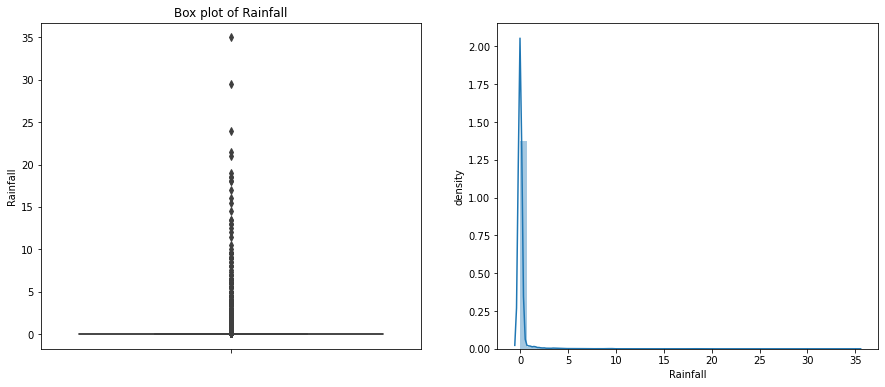

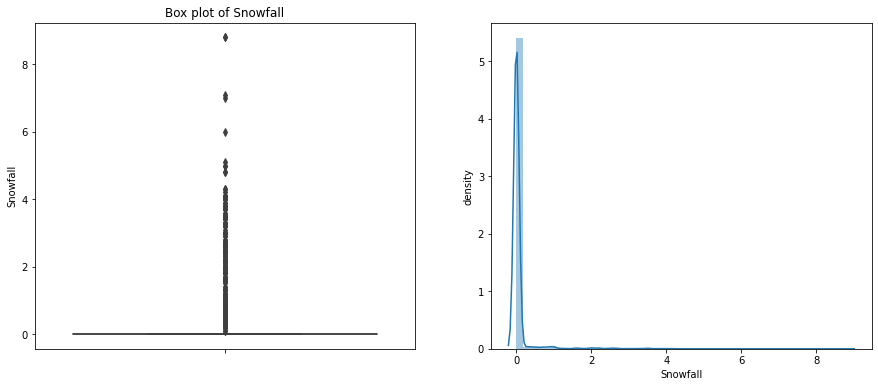

In [24]:
# Box plot and distribution plot for numerical variables
for var in Numerical_var:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=df[var])
    fig.set_title('Box plot of '+var)
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = sns.distplot(df[var].dropna())
    fig.set_ylabel('density')
    fig.set_xlabel(var)

    plt.show()

**Regression Plots vs. Temperature, Humidity and Windspeed**

In [ ]:
# Regression Plots with respect to Temperature, Humidity and Windspeed
fig = plt.figure(figsize=(18, 8))
axes = fig.add_subplot(1, 3, 1)
for features in Numerical_var[1:]:
  sns.regplot(data=mydata_without_outliers, x='temp', y='count',ax=axes)
  axes.set(title='Reg Plot for Temperature vs. Count')
  axes = fig.add_subplot(1, 3, 2)
  sns.regplot(data=mydata_without_outliers, x='humidity', y='count',ax=axes, color='r')
  axes.set(title='Reg Plot for Humidity vs. Count')
  axes = fig.add_subplot(1, 3, 3)
  sns.regplot(data=mydata_without_outliers, x='windspeed', y='count',ax=axes, color='g')
  axes.set(title='Reg Plot for Windspeed vs. Count')
plt.show()

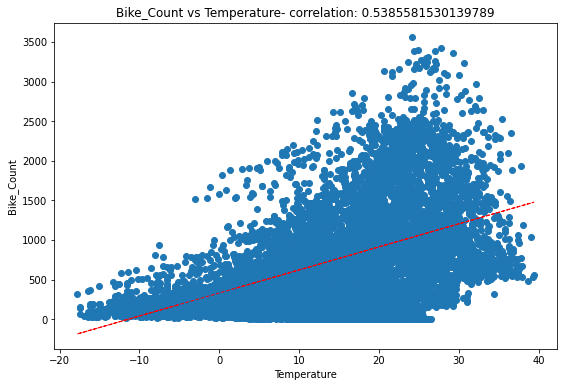

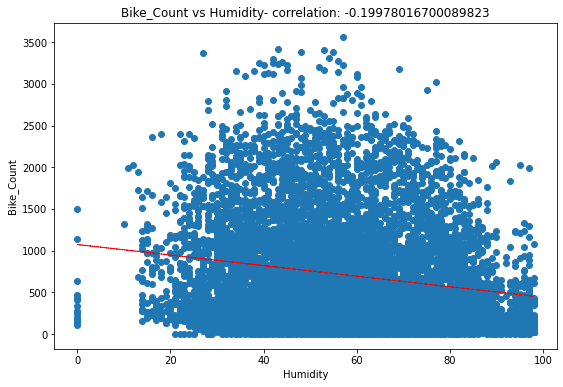

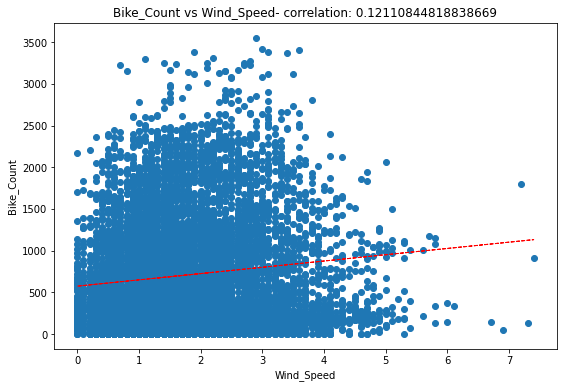

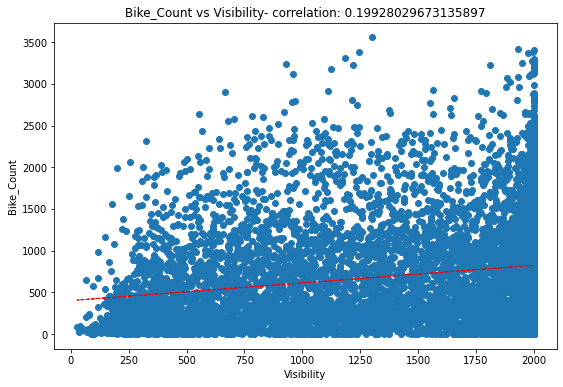

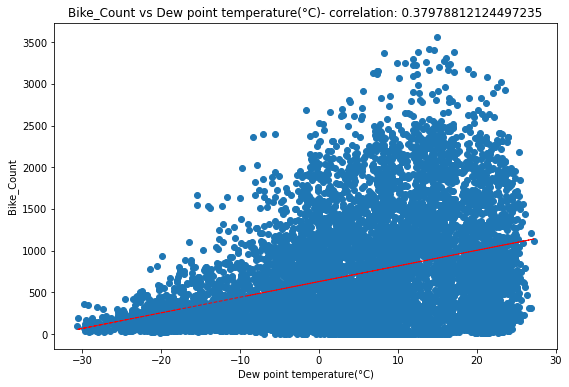

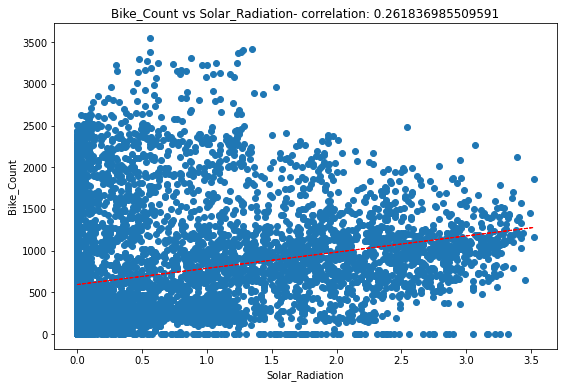

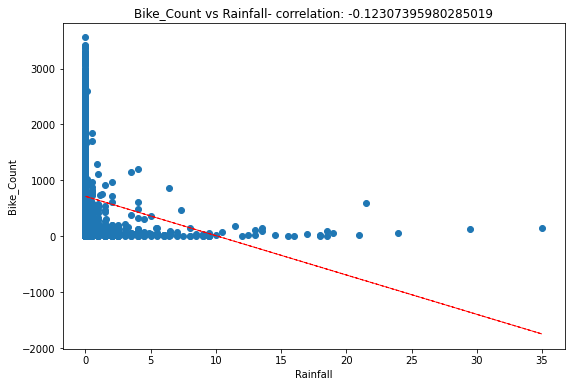

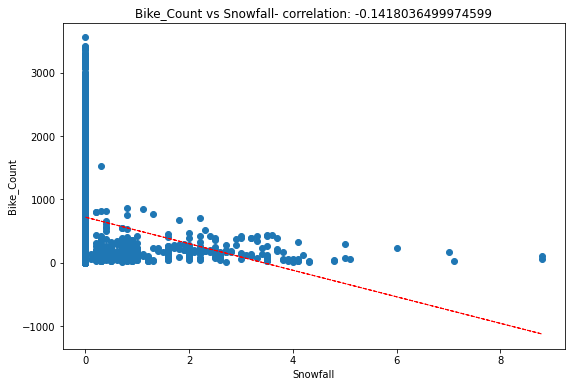

In [26]:
# Polyfit for the numerical var with bike count
for features in Numerical_var[1:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[features]
    label = df['Bike_Count']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(features)
    plt.ylabel('Bike_Count')
    ax.set_title('Bike_Count vs ' + features + '- correlation: ' + str(correlation))
    z = np.polyfit(df[features], df['Bike_Count'], 1)
    y_hat = np.poly1d(z)(df[features])

    plt.plot(df[features], y_hat, "r--", lw=1)

plt.show()

The above regplot indicates a positive correlation of count with temperature,solar radiation,visibility and windspeed and a negative correlation with humidity,rainfall and snowfall

**Correlation Plot**

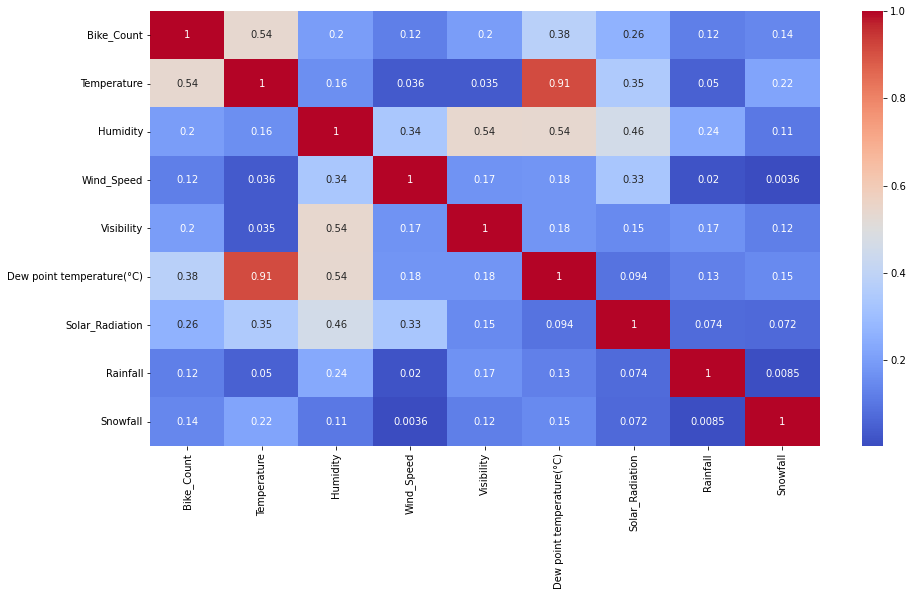

In [27]:
plt.figure(figsize=(15,8))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

Inference: Temperature and Dew Point Temperataure columns are highly correlated.

In [28]:
# droping Dew point temperature
df=df.drop(['Dew point temperature(°C)'],axis=1)

In [29]:
#number of unique values in all columns
df.nunique()

Date                365
Bike_Count         2166
Hour                 24
Temperature         546
Humidity             90
Wind_Speed           65
Visibility         1789
Solar_Radiation     345
Rainfall             61
Snowfall             51
Seasons               4
Holiday               2
Functioning_Day       2
Month                12
dtype: int64

In [30]:
df.head()

,Date,Bike_Count,Hour,Temperature,Humidity,Wind_Speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,Month
0,01/12/2017,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1
1,01/12/2017,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1
2,01/12/2017,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1
3,01/12/2017,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1
4,01/12/2017,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1


Since we are doing the bike demnad prediction on hourly basis, we can drop Data column also

In [32]:
my_data=df.drop(['Date'],axis=1)

In [33]:
my_data.head()

,Bike_Count,Hour,Temperature,Humidity,Wind_Speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,Month
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1


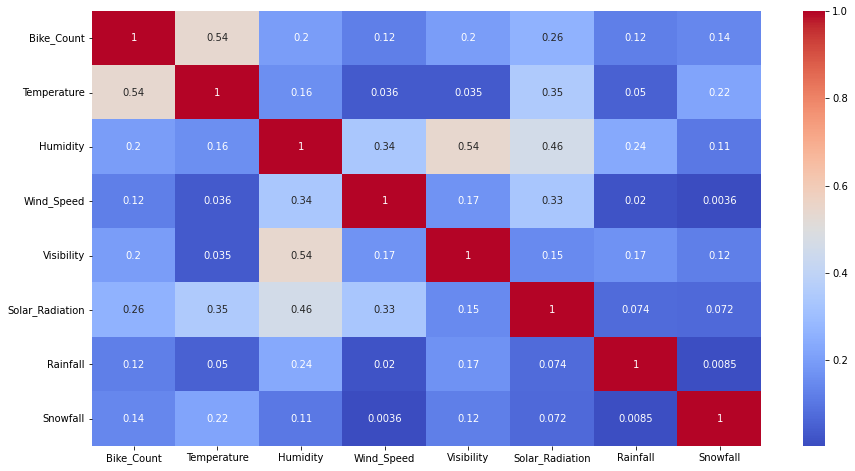

In [35]:
 ## Correlation
plt.figure(figsize=(15,8))
correlation = my_data.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [36]:
# multicollinearity checking by VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [37]:
calc_vif(data[[i for i in my_data.describe().columns if i not in ['Rented_Bike_Count']]])

,variables,VIF
0,Bike_Count,3.428485
1,Temperature,4.415463
2,Humidity,4.833669
3,Wind_Speed,4.214112
4,Visibility,4.714768
5,Solar_Radiation,2.251838
6,Rainfall,1.095993
7,Snowfall,1.119709


In [38]:
data_pred = my_data.copy()

In [39]:
data_pred['Month']=data_pred['Month'].astype('object')

In [40]:
#Assign all catagoriacla features to a variable
categorical_features=list(data_pred.select_dtypes(['object','category']).columns)
categorical_features=pd.Index(categorical_features)
categorical_features

Index(['Hour', 'Seasons', 'Holiday', 'Functioning_Day', 'Month'], dtype='object')

# One Hot Encoding

In [41]:
def one_hot_encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
    # Drop column  as it is now encoded
    data = data.drop([column], axis=1)
    return data

for col in categorical_features:
    data_pred = one_hot_encoding(data_pred, col)
data_pred.head()   

,Bike_Count,Temperature,Humidity,Wind_Speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Hour_1,Hour_2,...,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
0,254,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,204,-5.5,38,0.8,2000,0.0,0.0,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,173,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,107,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,78,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
# cross checking the features after one hot encoding
data_pred.columns

Index(['Bike_Count', 'Temperature', 'Humidity', 'Wind_Speed', 'Visibility',
       'Solar_Radiation', 'Rainfall', 'Snowfall', 'Hour_1', 'Hour_2', 'Hour_3',
       'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8', 'Hour_9', 'Hour_10',
       'Hour_11', 'Hour_12', 'Hour_13', 'Hour_14', 'Hour_15', 'Hour_16',
       'Hour_17', 'Hour_18', 'Hour_19', 'Hour_20', 'Hour_21', 'Hour_22',
       'Hour_23', 'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter',
       'Holiday_No Holiday', 'Functioning_Day_Yes', 'Month_2', 'Month_3',
       'Month_4', 'Month_5', 'Month_6', 'Month_7', 'Month_8', 'Month_9',
       'Month_10', 'Month_11', 'Month_12'],
      dtype='object')

In [45]:
data_pred['Functioning_Day_Yes'].unique()

array([1, 0], dtype=uint8)

In [47]:
data_for_features=data_pred.copy()

In [52]:
# Check for null values 
data_pred.isnull().any().any()

False

In [ ]:
# Store target variable in y
y=data_pred.pop('Bike_Count')

In [ ]:
y

In [56]:
#X is all remainign variable also our independent variables
X=data_pred

In [58]:
#test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3,random_state = 0)

In [59]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [60]:
import sklearn
from sklearn import linear_model

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the train data
regr.fit(X_train, y_train)

# Use the model to predict the test data
y_pred = regr.predict(X_test)

# Form residual
resid = y_test - y_pred

In [61]:
#get the X_train and X-test value
y_pred_train=regr.predict(X_train)
y_pred_test=regr.predict(X_test)

In [62]:
#mean squared error
MSE =np.mean(resid**2)
print('The Mean Squared Error is',MSE)

#Root Mean Squared Error
RMSE = np.sqrt(np.mean(resid**2))
print('The Root Mean Squared Error is',RMSE)
print()

# Mean Absolute Error
MAE = np.mean(np.abs(resid))
print('The Mean Absolute Error is',MAE)
print()

#Rsquared
R2 = r2_score(y_test, y_pred)
print('The Rsquared value is',R2)

Adjusted_R2_lr = (1-(1-r2_score(y_test, y_pred_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

The Mean Squared Error is 133145.36987810413
The Root Mean Squared Error is 364.89090133641884

The Mean Absolute Error is 276.5883035871525

The Rsquared value is 0.6736158604114644
Adjusted R2 : 0.6677988629604483


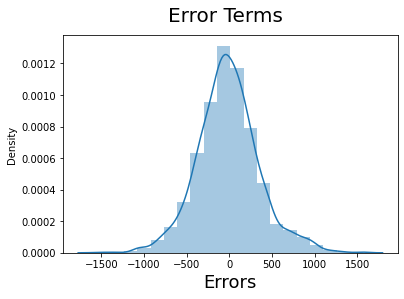

In [63]:
# Plot the distribution of errors
fig=plt.figure()
sns.distplot((resid),bins=20)
fig.suptitle('Error Terms',fontsize=20)
plt.xlabel('Errors',fontsize=18)
plt.show()

# **Model 2- Ridge**

In [65]:
#import the packages
from sklearn.linear_model import Ridge

ridge= Ridge(alpha=0.1)

In [67]:
#Fiting the model
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [68]:
#check the score
ridge.score(X_train, y_train)

0.675381426831363

In [69]:
#get the X_train and X-test value
y_pred_train_ridge=ridge.predict(X_train)
y_pred_test_ridge=ridge.predict(X_test)

In [70]:
#import the packages
resid = y_test - y_pred_test_ridge
from sklearn.metrics import mean_squared_error
# Mean Absolute Error
MAE_r = np.mean(np.abs(resid))
print('The Mean Absolute Error is',MAE)
print()

#calculate MSE
MSE_r= mean_squared_error((y_test), (y_pred_test_ridge))
print("MSE :",MSE_r)

#calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)



#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_r= r2_score(y_test, y_pred_test_ridge)
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score(y_test, y_pred_test_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

The Mean Absolute Error is 276.5883035871525

MSE : 133145.47134233877
RMSE : 364.8910403700518
R2 : 0.6736156116884562
Adjusted R2 : 0.667798609804562


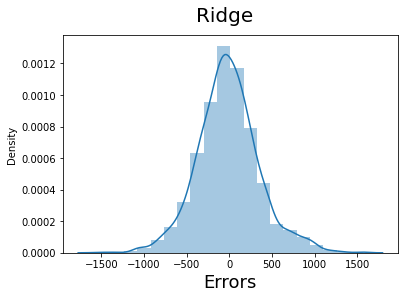

In [71]:
# Plot the distribution of errors
fig=plt.figure()
sns.distplot((resid),bins=20)
fig.suptitle('Ridge',fontsize=20)
plt.xlabel('Errors',fontsize=18)
plt.show()

# Model 3- Lasso Regession

In [72]:
# Create an instance of Lasso Regression implementation
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0, max_iter=3000)
# Fit the Lasso model
lasso.fit(X_train, y_train)
# Create the model score
print(lasso.score(X_test, y_test), lasso.score(X_train, y_train))

0.673448390379856 0.6752079117027137


In [73]:
#get the X_train and X-test value
y_pred_train_lasso=lasso.predict(X_train)
y_pred_test_lasso=lasso.predict(X_test)

In [74]:
resid = y_test - y_pred_test_lasso
# Mean Absolute Error
MAE_l = np.mean(np.abs(resid))
print('The Mean Absolute Error is',MAE_l)
print()

from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_l= mean_squared_error((y_test), (y_pred_test_lasso))
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)



from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_l= r2_score(y_test, y_pred_test_lasso)
print("R2 :",r2_l)
Adjusted_R2_l = (1-(1-r2_score(y_test, y_pred_test_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


The Mean Absolute Error is 276.40653258599974

MSE : 133213.6877177213
RMSE : 364.98450339394043
R2 : 0.673448390379856
Adjusted R2 : 0.6676284081859287


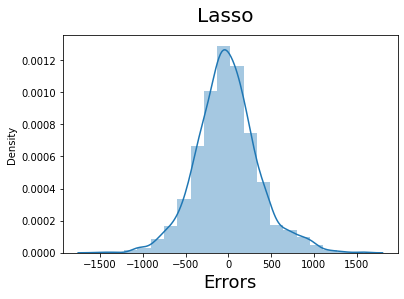

In [75]:
# Plot the distribution of errors
fig=plt.figure()
sns.distplot((resid),bins=20)
fig.suptitle('Lasso',fontsize=20)
plt.xlabel('Errors',fontsize=18)
plt.show()

## Model 4 - ElasticNet

In [76]:
#import the packages
from sklearn.linear_model import ElasticNet
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [77]:
#FIT THE MODEL
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [78]:
#check the score
elasticnet.score(X_train, y_train)

0.6728797590055644

In [79]:
#get the X_train and X-test value
y_pred_train_en=elasticnet.predict(X_train)
y_pred_test_en=elasticnet.predict(X_test)

In [80]:
resid = y_test - y_pred_test_en
# Mean Absolute Error
MAE_en = np.mean(np.abs(resid))
print('The Mean Absolute Error is',MAE_en)
print()

#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_en= mean_squared_error((y_test), (y_pred_test_en))
print("MSE :",MSE_en)

#calculate RMSE
RMSE_en=np.sqrt(MSE_en)
print("RMSE :",RMSE_en)

#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_en= r2_score(y_test, y_pred_test_en)
print("R2 :",r2_en)
Adjusted_R2_en=(1-(1-r2_score(y_test, y_pred_test_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


The Mean Absolute Error is 276.701000867071

MSE : 134490.73784978772
RMSE : 366.72978860434523
R2 : 0.6703179104469261
Adjusted R2 : 0.66444213511975


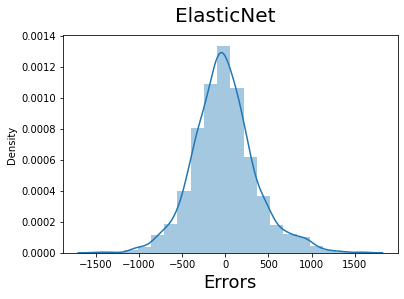

In [81]:
# Plot the distribution of errors
fig=plt.figure()
sns.distplot((resid),bins=20)
fig.suptitle('ElasticNet',fontsize=20)
plt.xlabel('Errors',fontsize=18)
plt.show()

Model 5 - Decision Tree Regressor

In [82]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
regressor = DecisionTreeRegressor(max_depth=10,random_state = 0) 
  
# fit the regressor with X and Y data
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, random_state=0)

In [83]:
#get the X_train and X-test value
y_pred_train_dt=regressor.predict(X_train)
y_pred_test_dt=regressor.predict(X_test)

In [84]:
# Mean Absolute Error
resid=y_test-y_pred_test_dt
MAE_dt = np.mean(np.abs(resid))
print('The Mean Absolute Error is',MAE_dt)
print()

MSE_dt= mean_squared_error((y_test), (y_pred_test_dt))
print("MSE :",MSE_dt)

#calculate RMSE
RMSE_dt=np.sqrt(MSE_dt)
print("RMSE :",RMSE_dt)

#Rsquared
R2_dt = r2_score(y_test, y_pred_test_dt)
print('The Rsquared value is',R2)

Adjusted_R2_dt = (1-(1-r2_score(y_test, y_pred_test_dt))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test_dt))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

The Mean Absolute Error is 216.91951201268336

MSE : 109023.14700390269
RMSE : 330.1865336501516
The Rsquared value is 0.6736158604114644
Adjusted R2 : 0.7279844321174349


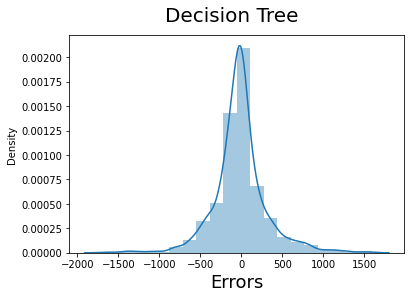

In [85]:
# Plot the distribution of errors
fig=plt.figure()
sns.distplot((resid),bins=20)
fig.suptitle('Decision Tree',fontsize=20)
plt.xlabel('Errors',fontsize=18)
plt.show()